# **Transactions Low Success Rate Diagnostic Analysis**

###  **Dataset Description:**
**Paytm** is an Indian multinational financial technology company. It specializes in digital payment system, e-commerce and financial services. Paytm wallet is a secure and RBI (Reserve Bank of India)- approved digital/mobile wallet that provides a myriad of financial features to fulfill every consumer’s payment needs. Paytm wallet can be topped up through UPI (Unified Payments Interface), internet banking, or credit/debit cards. Users can also transfer money from a Paytm wallet to recipient’s bank account or their own Paytm wallet.

Below is a small database of payment transactions from 2019 to 2020 of Paytm Wallet. The database
includes 6 tables:
- fact_transaction: Store information of all types of transactions: Payments, Top-up, Transfers, Withdrawals
- dim_scenario: Detailed description of transaction types
- dim_payment_channel: Detailed description of payment methods
- dim_platform: Detailed description of payment devices
- dim_status: Detailed description of the results of the transaction

### **Context:**
After calculating the Success Rate by Trasaction Type, the finding is that the rate of **"Top-up account"** type is the lowest compared to other types. So the boss want to know **the reasons why the success rate is so low**. As a data analyst, I would find insights and suggest solutions to improve success rate (if any).

<img src="image/Success Rate by Transaction Type.png" alt="Success Rate by Transaction Type" width="600"/>

### **Brainstorming:**
<img src="image/Brainstorming ideas.png" alt="Brainstorm" width="800"/>

In order to effectively analyze the low success rate of transactions, I have created a comprehensive brainstorming logic chart. My thought process begins with a thorough examination of the potential objects. This includes analyzing customer segments and demographics to gain insight into customer behavior. Additionally, I evaluate different transaction scenarios to determine if there is any correlation between specific transaction types and success rate. Timing is also a critical factor, as I examine differences in transaction success rates based on month/year, weekday, and time of day to identify any patterns. To determine the root cause of the low success rate, I analyze both internal and external issues. On the internal side, I consider system errors, including payment channel issues such as local card, debit card, credit card, bank account, and balance, as well as the payment platform, including iOS, Android, and Web. On the external side, I evaluate the potential impact of customer ignorance of the process or incorrect password entry.

### **Organize the ideas into a logic Issue Tree:**
<img src="image/Issue Tree.png" alt="Issue Tree" width="900"/>

### **Prioritize and Analysis**
**1. Task: Analyze these factors of Internal issues**
<br>1.1 Is there any difference in success rate and volume ratio between payment channels? Are there any changes over time (by month)?
<br>1.2 Is there any difference in success rate and volume ratio between payment platforms? Are there any changes over time (by month)?
<br>1.3 Is there any difference in success rate and volume ratio between scenario IDs?
<br>1.4 Which are the main errors of failed transactions? Are there any changes over time (by month)?

**2. Task: Analyze these factors of External issues**
<br>2.1 What percentage of the total number of failed transactions were the transactions that occurred before the customer’s first successful Top-up time?
<br>2.2 Percentage of error reasons coming from customers in the total error messages?
<br>2.3 Does the promotion factor affect the success rate result?

---

### **Results**
Firstly, although Top-up account has low success rate overall but the number of failed transactions decreased significantly by time, so it might not an urgent and impactful problem. Instead, "Payment" type has dramatical increase over time, speacially recently, so it is neccessary to address its problem by another analysis.

**For internal issues analysis**, I have defined that there are some technical issues needed the IT team to check, including "Local card" and "Debit card" for Payment Channel as fluctuating success rate over time. Besides, web platform also got a problem of low success rate over time and stop recording in April 2020, but the volume is too low so it is not a significant problem.

**For external issues analysis**, I addressed that the responsibility of the majority of failed transactions (more than 90%) belongs to customers, mostly because of not having enough funds and incorrect password (without counting the ambigious description of "Payment failed" which is needed to be clarified later). In addition, most of failed transaction are made by new customers who did not know how to make transactions in a right way, and that is improved significantly after their first successful transaction. Therefore, my suggestion for the marketing/sales team is to improve in customers education in terms of making transactions awareness.

---

### **Analysis process**
#### **1. Internal Issues**
##### **1.1 Payment Channel**
<img src="image/Payment Channel charts.png" alt="Payment Channel" width="900"/>

As the bar chart and line chart demonstrate, "Debit" and "Local card" have low success rate and fluctuate through the time. This suggest a next step is to keep following and deeply analyzing "Local card" and "Debit card" technical problems.

##### **1.2 Payment Platform**
<img src="image/Payment Platforms charts.png" alt="Payment Platform" width="900"/>

The success rate of "android" and "ios" are significantly higher than web. After plotting the success rate in the timeline, we can see the "web" success rate was fluctuate from Dec 2019 to Apr 2020 then gone. However, as the distribution of "Web" is quite low, it might not significant to tackle. 

For "android" and "ios", the rates were fluctuate in the late 2020, but recovered at the end. Thus, payment platform might not the main reason, and the suggestion for IT team is to check the platforms stabilization.

##### **1.3 Scenario**
As the Top-up account has only 2 scenarios and mostly distributed to one of them so it does not suggest any point.

##### **1.4 Main errors of failed transactions**
<img src="image/Status Description charts.png" alt="Status Description" width="1300"/>

Besides "Payment failed" reason which is the most common but quite ambigious, "not have enough funds" and "incorrect payment password" are the next two most common reasons so that it would be considerable change if making impact on those. So far, I can suggest the marketing team to encourage customers to have more reserve in their top-up account and educate customers about transaction making process.

Besides, the number of failed transactions decreased significantly after Jan 2020, which needs another analysis to explain.

#### **2. External Issues**
##### **2.1 Customers Awareness**
<img src="image/Histogram of new customer.png" alt="New customers" width="500"/>

About 72% of the total number of failed transactions were the transactions that occurred before the customer’s first successful Top-up time, which means the majority of customers know how to successfully make transactions after the first success (customers' issue).

##### **2.2 Error Responsibility**
<img src="image/Error Responsibility Distribution.png" alt="Error Responsibility" width="400"/>

The percentage of error reasons source is mainly from customers.

##### **2.3 Promotion Factor**
For Top-up account transactions, promotion_id has only 1 value (0) so it could not affect the transaction. Moreover, I have checked whether the promotions of other categories affect the failed transaction of Top-up account. After compare the number of failed transactions change and the promotion numbers by timeline, it seems to be related positively in 2019 and negatively in 2020. Therefore, temperarily, I cannot conclude the correlation of them.

<img src="image/Promotion and Error by time.png" alt="Promotion and Error" width="700"/>

#### ***Define further analysis**

Although Top-up account has low success rate overall but the number of failed transactions decreased significantly by time, so it might not an urgent and impactful problem. Instead, "Payment" type has dramatical increase over time, speacially recently, so it is neccessary to address its problem by another analysis.

<img src="image/Transaction Type count by time.png" alt="Transaction Type count by time" width="500"/>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
trans19 = pd.read_csv("dim_fact_transaction_2019.csv")
trans20 = pd.read_csv("dim_fact_transaction_2020.csv")
paymentChannel = pd.read_csv("dim_payment_channel.csv")
platform = pd.read_csv("dim_platform.csv")
scenario = pd.read_csv("dim_scenario.csv")
status = pd.read_csv("dim_status.csv")

### **Explore Success Rate by Transaction Type**

In [3]:
# Concatenate dataset of 2 years
trans = pd.concat([trans19,trans20])

# Change transaction_time to datetime format
trans['transaction_time'] = pd.to_datetime(trans['transaction_time'])

# Merge dataset into a complete dataset
df = trans.merge(right=paymentChannel, on='payment_channel_id', how='left')
df = df.merge(right=platform, on='platform_id', how='left')
df = df.merge(right=scenario, on='scenario_id', how='left')
df = df.merge(right=status, on='status_id', how='left')

# Add year_month columns in dataset
df['year_month'] = df['transaction_time'].dt.to_period("M")

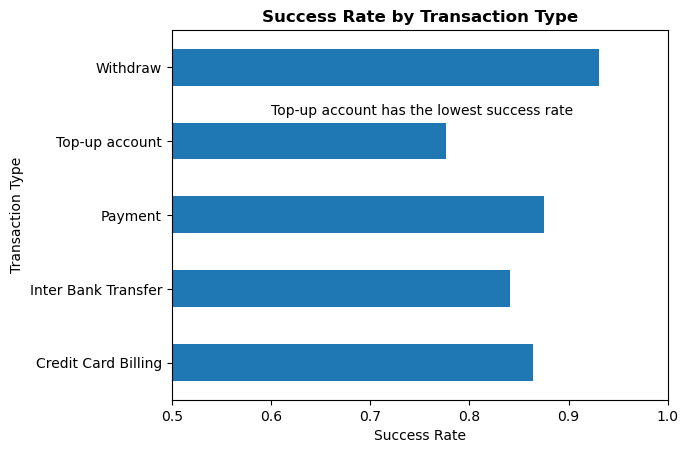

In [4]:
# Calculate success rate by transaction type
success_rate = df.groupby('transaction_type', as_index=False)['status_id'].count().rename(columns={"status_id":"total_trans"})
success_rate['success_trans'] = list(df[df['status_id']==1].groupby('transaction_type')['status_id'].count())
success_rate['success_rate'] = success_rate['success_trans'] / success_rate['total_trans']

# Plot success rate
success_rate.plot(kind='barh',x='transaction_type',y='success_rate')
plt.xlabel('Success Rate')
plt.ylabel("Transaction Type")
plt.title('Success Rate by Transaction Type', weight='bold')
plt.xlim(0.5,1)
plt.text(x=0.6,y=3.35,s="Top-up account has the lowest success rate")
plt.legend().remove()
plt.savefig("image/Success Rate by Transaction Type",bbox_inches='tight')

### **1. Internal Issues Analysis**

In [5]:
# Filter "Top-up account" transactions
topup = df[df['transaction_type'] == "Top-up account"]

#### **1.1 Payment Channel**

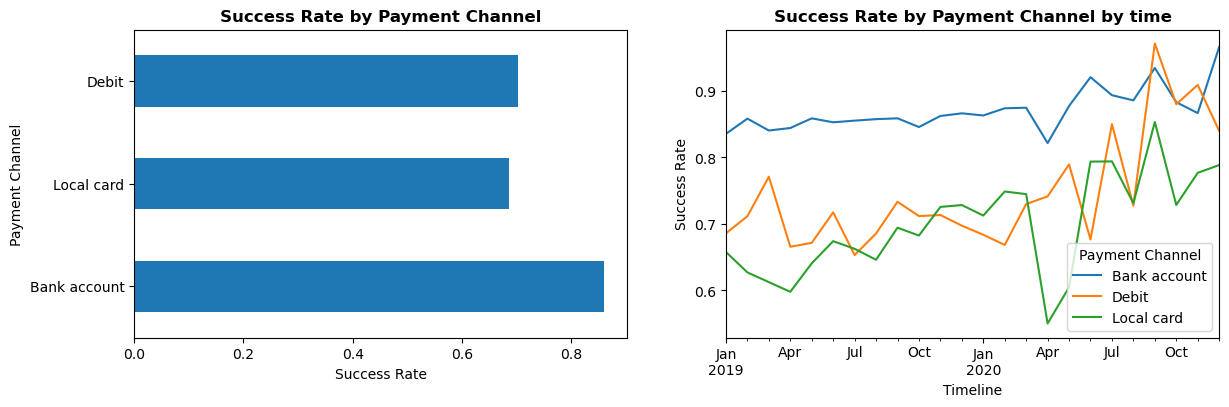

In [6]:
# Create Success Rate by Payment Channel table
pay_channel = topup['payment_method'].value_counts().reset_index().rename(columns={"index":"payment_channel", "payment_method":"total_trans"})
pay_channel['success_trans'] = list(topup[topup["status_description"]=="Success"]['payment_method'].value_counts())
pay_channel['success_rate'] = pay_channel['success_trans'] / pay_channel['total_trans']

# Create figure for subplots
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,4))

# Plot Success Rate by Payment Channel
# As "Balance" and "Credit" have too low distribution so they would be removed in the plot
pay_channel.iloc[:3,:].plot(kind='barh',x='payment_channel',y='success_rate', ax=ax1)
ax1.set_ylabel("Payment Channel")
ax1.set_title("Success Rate by Payment Channel", weight='bold')
ax1.set_xlabel("Success Rate")
ax1.get_legend().remove()

# Define Success Rate by Payment Channel by time
ym_channel = topup[['year_month','payment_method']].value_counts().reset_index().rename(columns={0:"total_trans"})
ym_channel_success = topup[topup["status_description"]=="Success"][['year_month','payment_method']].value_counts().reset_index().rename(columns={0:"success_trans"})
ym_channel = ym_channel.merge(right=ym_channel_success, on=['year_month','payment_method'], how='left').fillna(0)
ym_channel['success_rate'] = ym_channel['success_trans'] / ym_channel['total_trans']
ym_channel_pivot = ym_channel.pivot_table(index='year_month',columns='payment_method',values='success_rate').loc[:,['Bank account', 'Debit', 'Local card']]

# Plot Success Rate by Payment Channel by time
ym_channel_pivot.plot(ax=ax2)
ax2.set_ylabel("Success Rate")
ax2.set_xlabel("Timeline")
ax2.set_title("Success Rate by Payment Channel by time",weight='bold')
ax2.legend(title="Payment Channel")

plt.savefig("image/Payment Channel charts",bbox_inches='tight')

➡️ **Inference**: As the bar chart and line chart demonstrate, "Debit" and "Local card" have low success rate and fluctuate through the time. This suggest a next step is to keep following and deeply analyzing "Local card" and "Debit card" technical problems.

#### **1.2 Payment Platform**

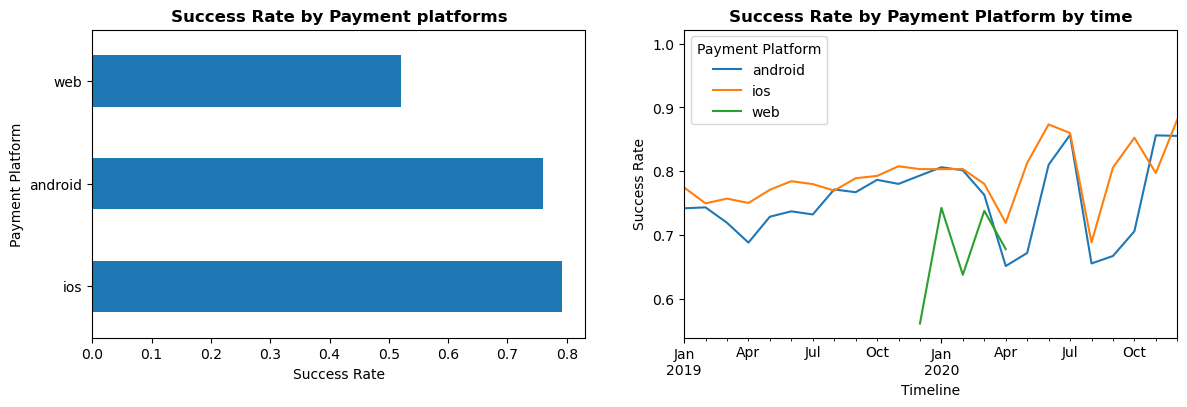

In [7]:
# Create Success Rate by Payment Platforms table
failed_platform = topup['payment_platform'].value_counts().reset_index().rename(columns={"payment_platform":"total_trans","index":"payment_platform"})
failed_platform['success_trans'] = list(topup[topup['status_description'] == "Success"]['payment_platform'].value_counts())
failed_platform['success_rate'] = failed_platform['success_trans'] / failed_platform['total_trans']

# Create figure for subplots
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,4))

# Plot Success Rate by Payment platforms
failed_platform.plot(kind='barh',x='payment_platform',y='success_rate', ax=ax1)
ax1.set_title("Success Rate by Payment platforms", weight='bold')
ax1.set_xlabel("Success Rate")
ax1.get_legend().remove()
ax1.set_ylabel("Payment Platform")

# Define Success Rate by Payment platform by time
ym_platform = topup[['year_month','payment_platform']].value_counts().reset_index().rename(columns={0:"total_trans"})
ym_platform['success_trans'] = list(topup[topup["status_description"]=="Success"][['year_month','payment_platform']].value_counts())
ym_platform['success_rate'] = ym_platform['success_trans'] / ym_platform['total_trans']

# Plot Success Rate by Payment platform by time
ym_platform.pivot_table(index='year_month',columns='payment_platform',values='success_rate').plot(ax=ax2)
ax2.set_title("Success Rate by Payment Platform by time", weight='bold')
ax2.set_ylabel("Success Rate")
ax2.set_xlabel("Timeline")
ax2.legend(title="Payment Platform")
plt.savefig("image/Payment Platforms charts",bbox_inches='tight')

➡️ **Inference**: The success rate of "android" and "ios" are significantly higher than web. After plotting the success rate in the timeline, we can see the "web" success rate was fluctuate from Dec 2019 to Apr 2020 then gone. However, as the distribution of "Web" is quite low, it might not significant to tackle. 

For "android" and "ios", the rates were fluctuate in the late 2020, but recovered at the end. Thus, payment platform might not the main reason, and the suggestion for IT team is to check the platforms stabilization.

#### **1.3 Scenario**

In [8]:
scenario[scenario['transaction_type'] == "Top-up account"]

,scenario_id,transaction_type,sub_category,category
18,S1_118,Top-up account,Not Payment,Not Payment
346,S2_1,Top-up account,Not Payment,Not Payment


In [9]:
df[df['transaction_type'] == "Top-up account"]['scenario_id'].value_counts()

S2_1      206239
S1_118        32
Name: scenario_id, dtype: int64

➡️ **Inference**: As the Top-up account has only 2 scenarios and mostly distributed to one of them so it does not suggest any point.

#### **1.4 Main errors of failed transactions**

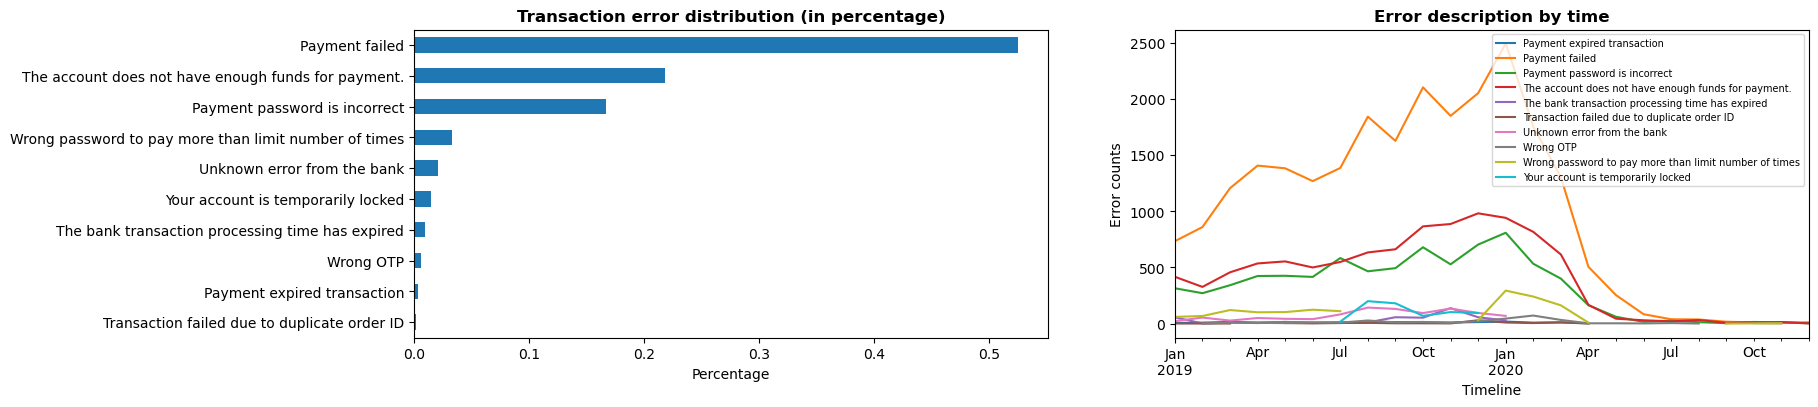

In [10]:
# Create figure for subplots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,4))

# Plot errors distribution
topup[topup['status_description'] != "Success"]['status_description'].value_counts(normalize=True).plot(kind='barh',ax=ax1)
ax1.set_title("Transaction error distribution (in percentage)", weight='bold')
ax1.set_xlabel("Percentage")
ax1.invert_yaxis()

# Plot errors distribution by time
status_time = topup[topup['status_description']!="Success"].groupby(['year_month','status_description'], as_index=False)['transaction_id'].count()
status_time.pivot_table(index='year_month',columns="status_description",values='transaction_id').plot(ax=ax2)
ax2.legend(fontsize=7)
ax2.set_title("Error description by time", weight='bold')
ax2.set_ylabel("Error counts")
ax2.set_xlabel("Timeline")

plt.savefig("image/Status Description charts",bbox_inches='tight')


➡️ Inference: Besides "Payment failed" reason which is the most common but quite ambigious, "not have enough funds" and "incorrect payment password" are the next two most common reasons so that it would be considerable change if making impact on those. So far, I can suggest the marketing team to encourage customers to have more reserve in their top-up account and educate customers about transaction making process.

Besides, the number of failed transactions decreased significantly after Jan 2020, which needs another analysis to explain.

### **2. Analyze external issues**

#### **2.1 Customers Awareness**

In [11]:
# Calculate percentage of the total number of failed transactions were the transactions that occurred before the customer’s first successful Top-up time?
cus_first_success = topup[topup['status_description']=="Success"].groupby('customer_id', as_index=False)['transaction_time'].min()
cus_df = topup[['customer_id','transaction_time']]
cus_df = cus_df.merge(right=cus_first_success,on='customer_id',how='left').fillna(np.min(df['transaction_time']))
cus_df.columns = ['customer_id','transaction_time','first_success']
cus_group = cus_df[cus_df['transaction_time'] < cus_df['first_success']].groupby('customer_id', as_index=False)['transaction_time'].count().rename(columns={"transaction_time":"before_success"})
cus_failed = topup[topup['status_description'] != "Success"]['customer_id'].value_counts().reset_index().rename(columns={"index":"customer_id","customer_id":"total_fail"})
cus_group = cus_group.merge(right=cus_failed,on='customer_id',how='left')
cus_group['before_pct'] = cus_group['before_success'] / cus_group['total_fail']
cus_group.fillna(0, inplace=True)
cus_group['before_pct'].describe()

count    3904.000000
mean        0.722120
std         0.331139
min         0.011111
25%         0.461538
50%         1.000000
75%         1.000000
max         1.000000
Name: before_pct, dtype: float64

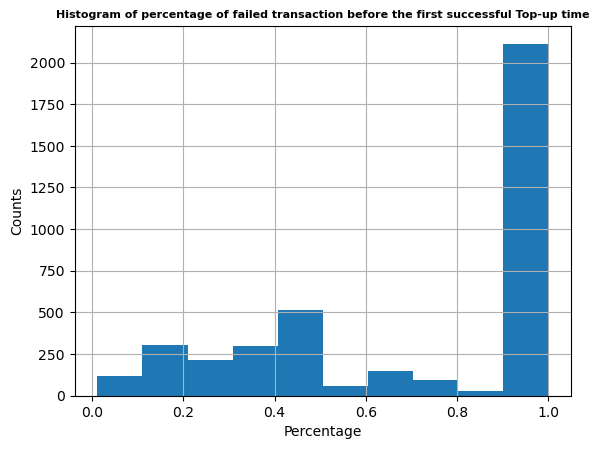

In [12]:
# Plot the histogram of percentage of failed transaction before the first successful Top-up time
cus_group[cus_group['before_pct']>0]['before_pct'].hist()
plt.title("Histogram of percentage of failed transaction before the first successful Top-up time", weight='bold', fontsize=8)
plt.xlabel("Percentage")
plt.ylabel("Counts")
plt.savefig("image/Histogram of new customer",bbox_inches='tight')

➡️ **Inference**: About 72% of the total number of failed transactions were the transactions that occurred before the customer’s first successful Top-up time, which means the majority of customers know how to successfully make transactions after the first success (customers' issue).

#### **2.2 Define errors root sides**

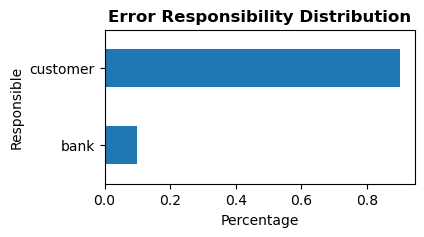

In [13]:
# Categorize the responsible based on Error Description
issue_cat = topup['status_description'].value_counts().reset_index().rename(columns={"index":"status_description","status_description":"count"})
category = []
for i in issue_cat['status_description']:
    if i in ['The account does not have enough funds for payment.',
    'Payment password is incorrect',
    'Wrong password to pay more than limit number of times','Wrong OTP',
    'Payment expired transaction']: category.append("customer")
    elif i in ["Success","Payment failed"]: category.append(np.nan)
    else: category.append("bank")
issue_cat['issue_category'] = category

# Calculate the distribution of error "makers"
issue_group = issue_cat.groupby('issue_category', as_index=False)['count'].sum()
issue_group['pct'] = issue_group['count'] / np.sum(issue_group['count'])
issue_group.plot(kind='barh',x='issue_category',y='pct',figsize=(4,2))
plt.title("Error Responsibility Distribution", weight='bold')
plt.ylabel("Responsible")
plt.xlabel("Percentage")
plt.legend().remove()

plt.savefig("image/Error Responsibility Distribution", bbox_inches='tight')

➡️ **Inference**: the percentage of error reasons source is mainly from customers


### **2.3 Promotion factor**

➡️ For Top-up account transactions, promotion_id has only 1 value (0) so it could not affect the transaction.

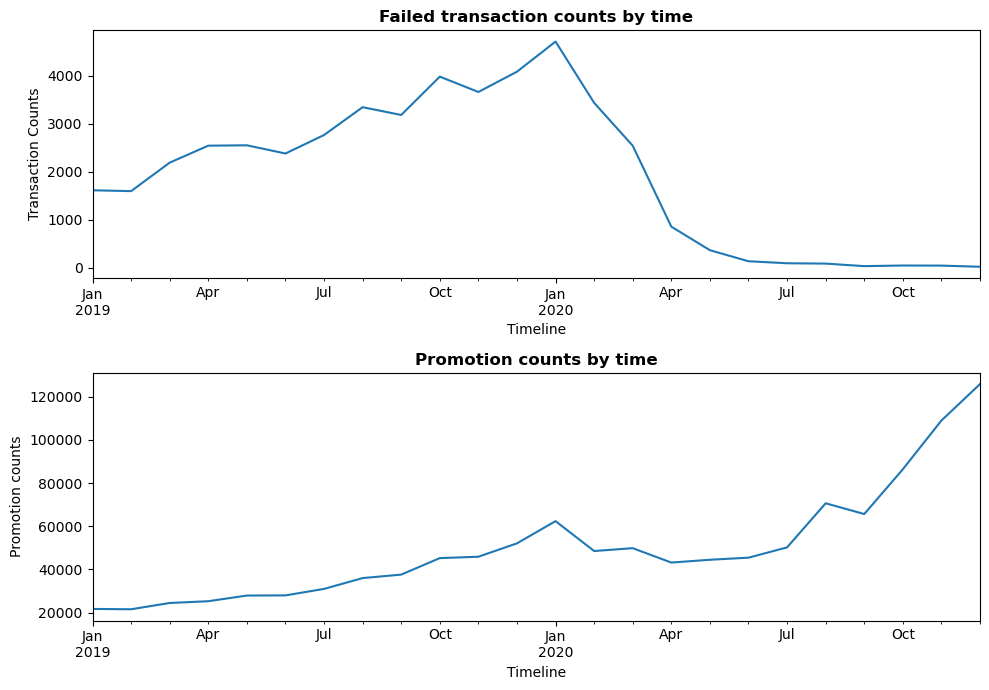

In [14]:
# Check whether the promotions of other categories affect the failed transaction of Top-up account
promo_group = df[df['promotion_id'] != 0].groupby('year_month')['promotion_id'].count()

# Plot the failed transaction counts and promotion counts by time
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,7))
topup[topup['status_description'] != "Success"].groupby('year_month')['transaction_id'].count().plot(ax=ax1)
ax1.set_ylabel("Transaction Counts")
ax1.set_xlabel("Timeline")
ax1.set_title("Failed transaction counts by time", weight='bold')

promo_group.plot(ax=ax2)
ax2.set_title("Promotion counts by time",weight='bold')
ax2.set_ylabel("Promotion counts")
ax2.set_xlabel("Timeline")
plt.tight_layout()

plt.savefig("image/Promotion and Error by time", bbox_inches='tight')

➡️ **Inference**: After compare the number of failed transactions change and the promotion numbers by timeline, it seems to be related positively in 2019 and negatively in 2020. Therefore, temperarily, I cannot conclude the correlation of them.

### ***Define further analysis**

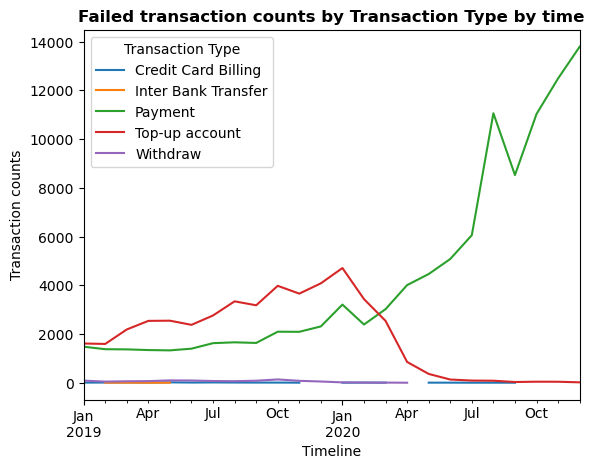

In [15]:
# Plot Failed transaction by Transaction types by time
df[(df['status_description'] != "Success")].groupby(['year_month','transaction_type'],as_index=False)['status_description'].count().pivot_table(index='year_month',columns='transaction_type',values='status_description').plot()
plt.legend(title="Transaction Type")
plt.title("Failed transaction counts by Transaction Type by time",weight='bold')
plt.xlabel("Timeline")
plt.ylabel("Transaction counts")
plt.savefig("image/Transaction Type count by time",bbox_inches='tight')

➡️ **Inference**: Although Top-up account has low success rate overall but the number of failed transactions decreased significantly by time, so it might not an urgent and impactful problem. Instead, "Payment" type has dramatical increase over time, speacially recently, so it is neccessary to address its problem by another analysis.